In [1]:
import numpy as np
import pandas as pd
import random
import gc
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [2]:
train_questions_processed = pd.read_pickle("./processing_data/train_questions_processed"+ ".pkl")

In [4]:
feature_name = [#'Q_avg_elapsed_time',
                #'timestamp_delta',
                'log_timestamp', 
                'cum_correction_rate', 
                'cum_question_answeared', 
                'Q_Correction_rate', 
                #'moving_correction_rate_5',
                'viewed_lecture_count',
                #'moving_correction_rate_10',
                #    'moving_correction_rate_15',
                #    'moving_correction_rate_20',
                #'Tag_Correction_rate', 
                #'Part_Correction_rate', 
    'answered_correctly_1',
    'answered_correctly_2',
    'answered_correctly_3',
    'answered_correctly_4',
    'answered_correctly_5',
    'answered_correctly_6',
    'answered_correctly_7',
    'answered_correctly_8',
    'answered_correctly_9',
                'cum_correction_rate_P',
                'cum_correction_rate_T', 
                #'cum_correction_rate_P_ratio',
                #'cum_correction_rate_T_ratio', 
                #'n_q_container',
                'question_n_tags',
                'tag_cluster',
                #'count_lecture_tags',
                #'count_lecture_tags_short',
                #'Q_Correction_rate_count_lecture_tags',
                #'Q_Correction_rate_count_lecture_tags_short',
                'pq_exp',
                'part',
                #'avg_q_time',
                #'cum_score',
                'if_lectured',
                #'valuation_questions',
                "if_1st_enconter"]
                #'n_enconter']

In [5]:
categorical_feature_name = ['pq_exp','part'
                            ,'if_1st_enconter'
                                ,'answered_correctly_1',
    'answered_correctly_2',
    'answered_correctly_3',
    'answered_correctly_4',
    'answered_correctly_5'
                            ,'tag_cluster','if_lectured'
                            #,'valuation_questions'
                           # ,'n_enconter'
                           ]

In [5]:
data = train_questions_processed.loc[train_questions_processed['Train'] == True,feature_name]
label = train_questions_processed.loc[train_questions_processed['Train'] == True,'answered_correctly']

train_data = lgb.Dataset(data, label=label, feature_name=feature_name, 
                         categorical_feature= categorical_feature_name)

In [6]:
raw_data=None
gc

<module 'gc' (built-in)>

In [7]:
data = train_questions_processed.loc[train_questions_processed['Train'] == False,feature_name]
label = train_questions_processed.loc[train_questions_processed['Train'] == False,'answered_correctly']

validation_data = lgb.Dataset(data, label=label, feature_name=feature_name, 
                              categorical_feature= categorical_feature_name)

In [8]:
raw_data=None
gc

<module 'gc' (built-in)>

In [9]:
del train_questions_processed
gc.collect()
train_questions_processed = pd.DataFrame()
train_questions_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [10]:
param = {'objective': 'binary',
        'metric' : 'auc',
        'max_depth' :7,
         'num_leaves': 70}
num_boost_round=5000
bst = lgb.train(param, train_data, num_boost_round, valid_sets=[validation_data],early_stopping_rounds=5)

D:\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Info] Number of positive: 55963184, number of negative: 29208782
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.581781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 85171966, number of used features: 22


D:\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
D:\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.657061 -> initscore=0.650225
[LightGBM] [Info] Start training from score 0.650225
[1]	valid_0's auc: 0.74796
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.750211
[3]	valid_0's auc: 0.751525
[4]	valid_0's auc: 0.752314
[5]	valid_0's auc: 0.75305
[6]	valid_0's auc: 0.753423
[7]	valid_0's auc: 0.753799
[8]	valid_0's auc: 0.754164
[9]	valid_0's auc: 0.754512
[10]	valid_0's auc: 0.754794
[11]	valid_0's auc: 0.755122
[12]	valid_0's auc: 0.755405
[13]	valid_0's auc: 0.755597
[14]	valid_0's auc: 0.755815
[15]	valid_0's auc: 0.756089
[16]	valid_0's auc: 0.75629
[17]	valid_0's auc: 0.756512
[18]	valid_0's auc: 0.756775
[19]	valid_0's auc: 0.756978
[20]	valid_0's auc: 0.757175
[21]	valid_0's auc: 0.757351
[22]	valid_0's auc: 0.757534
[23]	valid_0's auc: 0.75772
[24]	valid_0's auc: 0.757892
[25]	valid_0's auc: 0.758034
[26]	valid_0's auc: 0.758195
[27]	valid_0's auc: 0.758331
[28]	valid_0's auc: 0.758468
[29]	vali

[273]	valid_0's auc: 0.763191
[274]	valid_0's auc: 0.763192
[275]	valid_0's auc: 0.763198
[276]	valid_0's auc: 0.763201
[277]	valid_0's auc: 0.763204
[278]	valid_0's auc: 0.763205
[279]	valid_0's auc: 0.763206
[280]	valid_0's auc: 0.763209
[281]	valid_0's auc: 0.763212
[282]	valid_0's auc: 0.763213
[283]	valid_0's auc: 0.763213
[284]	valid_0's auc: 0.763216
[285]	valid_0's auc: 0.763218
[286]	valid_0's auc: 0.763219
[287]	valid_0's auc: 0.76322
[288]	valid_0's auc: 0.763228
[289]	valid_0's auc: 0.763233
[290]	valid_0's auc: 0.763245
[291]	valid_0's auc: 0.763248
[292]	valid_0's auc: 0.763256
[293]	valid_0's auc: 0.763257
[294]	valid_0's auc: 0.763259
[295]	valid_0's auc: 0.763261
[296]	valid_0's auc: 0.763266
[297]	valid_0's auc: 0.763269
[298]	valid_0's auc: 0.763273
[299]	valid_0's auc: 0.763274
[300]	valid_0's auc: 0.763276
[301]	valid_0's auc: 0.763278
[302]	valid_0's auc: 0.763282
[303]	valid_0's auc: 0.763288
[304]	valid_0's auc: 0.763297
[305]	valid_0's auc: 0.763299
[306]	valid

[548]	valid_0's auc: 0.763863
[549]	valid_0's auc: 0.763863
[550]	valid_0's auc: 0.763864
[551]	valid_0's auc: 0.763864
[552]	valid_0's auc: 0.763868
[553]	valid_0's auc: 0.763872
[554]	valid_0's auc: 0.763874
[555]	valid_0's auc: 0.763875
[556]	valid_0's auc: 0.763878
[557]	valid_0's auc: 0.763881
[558]	valid_0's auc: 0.763882
[559]	valid_0's auc: 0.763883
[560]	valid_0's auc: 0.763884
[561]	valid_0's auc: 0.763885
[562]	valid_0's auc: 0.763885
[563]	valid_0's auc: 0.763885
[564]	valid_0's auc: 0.763885
[565]	valid_0's auc: 0.763885
[566]	valid_0's auc: 0.763886
[567]	valid_0's auc: 0.763887
[568]	valid_0's auc: 0.763888
[569]	valid_0's auc: 0.763891
[570]	valid_0's auc: 0.763891
[571]	valid_0's auc: 0.763891
[572]	valid_0's auc: 0.763895
[573]	valid_0's auc: 0.763896
[574]	valid_0's auc: 0.763901
[575]	valid_0's auc: 0.763902
[576]	valid_0's auc: 0.763905
[577]	valid_0's auc: 0.763906
[578]	valid_0's auc: 0.763908
[579]	valid_0's auc: 0.763909
[580]	valid_0's auc: 0.763911
[581]	vali

[823]	valid_0's auc: 0.7643
[824]	valid_0's auc: 0.764301
[825]	valid_0's auc: 0.764302
[826]	valid_0's auc: 0.764303
[827]	valid_0's auc: 0.764303
[828]	valid_0's auc: 0.764306
[829]	valid_0's auc: 0.764306
[830]	valid_0's auc: 0.764308
[831]	valid_0's auc: 0.764311
[832]	valid_0's auc: 0.764313
[833]	valid_0's auc: 0.764314
[834]	valid_0's auc: 0.764317
[835]	valid_0's auc: 0.76432
[836]	valid_0's auc: 0.764322
[837]	valid_0's auc: 0.764322
[838]	valid_0's auc: 0.764325
[839]	valid_0's auc: 0.764326
[840]	valid_0's auc: 0.764327
[841]	valid_0's auc: 0.764328
[842]	valid_0's auc: 0.764328
[843]	valid_0's auc: 0.764328
[844]	valid_0's auc: 0.764328
[845]	valid_0's auc: 0.764328
[846]	valid_0's auc: 0.764329
[847]	valid_0's auc: 0.76433
[848]	valid_0's auc: 0.764331
[849]	valid_0's auc: 0.764331
[850]	valid_0's auc: 0.764334
[851]	valid_0's auc: 0.764338
[852]	valid_0's auc: 0.76434
[853]	valid_0's auc: 0.764341
[854]	valid_0's auc: 0.764343
[855]	valid_0's auc: 0.764343
[856]	valid_0's

[1095]	valid_0's auc: 0.764566
[1096]	valid_0's auc: 0.764566
[1097]	valid_0's auc: 0.764566
[1098]	valid_0's auc: 0.764568
[1099]	valid_0's auc: 0.764571
[1100]	valid_0's auc: 0.764574
[1101]	valid_0's auc: 0.764575
[1102]	valid_0's auc: 0.764577
[1103]	valid_0's auc: 0.764577
[1104]	valid_0's auc: 0.764577
[1105]	valid_0's auc: 0.764577
[1106]	valid_0's auc: 0.764579
[1107]	valid_0's auc: 0.76458
[1108]	valid_0's auc: 0.76458
[1109]	valid_0's auc: 0.764581
[1110]	valid_0's auc: 0.764581
[1111]	valid_0's auc: 0.764582
[1112]	valid_0's auc: 0.764582
[1113]	valid_0's auc: 0.764583
[1114]	valid_0's auc: 0.764584
[1115]	valid_0's auc: 0.764585
[1116]	valid_0's auc: 0.764586
[1117]	valid_0's auc: 0.764589
[1118]	valid_0's auc: 0.76459
[1119]	valid_0's auc: 0.764592
[1120]	valid_0's auc: 0.764592
[1121]	valid_0's auc: 0.764593
[1122]	valid_0's auc: 0.764595
[1123]	valid_0's auc: 0.764596
[1124]	valid_0's auc: 0.7646
[1125]	valid_0's auc: 0.7646
[1126]	valid_0's auc: 0.764601
[1127]	valid_0'

[1361]	valid_0's auc: 0.764801
[1362]	valid_0's auc: 0.764801
[1363]	valid_0's auc: 0.7648
[1364]	valid_0's auc: 0.7648
[1365]	valid_0's auc: 0.7648
[1366]	valid_0's auc: 0.7648
Early stopping, best iteration is:
[1361]	valid_0's auc: 0.764801


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

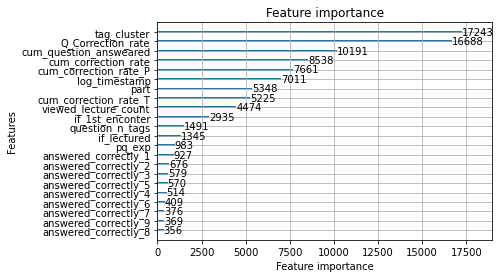

In [11]:
lgb.plot_importance(bst)

In [13]:
bst.save_model('lgb_classifier_10.txt') 
#bst = lgb.Booster(model_file='lgb_classifier_10.txt')

## AUC on train

In [2]:
train_questions_processed = pd.read_pickle("./processing_data/train_questions_processed"+ ".pkl")
bst = lgb.Booster(model_file='lgb_classifier_10.txt')

In [6]:
train_data = train_questions_processed.loc[train_questions_processed['Train'] == True,feature_name]
train_label = train_questions_processed.loc[train_questions_processed['Train'] == True,'answered_correctly']

#val_data = train_questions_processed.loc[train_questions_processed['Train'] == False,feature_name]
#val_label = train_questions_processed.loc[train_questions_processed['Train'] == False,'answered_correctly']

In [7]:
train_questions_processed = pd.DataFrame()
gc.collect()

20

In [8]:
train_pred = bst.predict(train_data)

In [9]:
roc_auc_score(train_label, train_pred)

0.7681290784840539